In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
mon = pd.read_csv('월별+교통사고+현황_2022.csv')
plt.rcParams.update({'font.family':'Malgun Gothic'})
mon

,자치구별(1),자치구별(2),2022. 01,2022. 01.1,2022. 01.2,2022. 02,2022. 02.1,2022. 02.2,2022. 03,2022. 03.1,...,2022. 10.2,2022. 11,2022. 11.1,2022. 11.2,2022. 12,2022. 12.1,2022. 12.2,2022,2022.1,2022.2
0,자치구별(1),자치구별(2),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),...,부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명)
1,합계,소계,2874,18,3868,2176,16,2919,2187,12,...,4256,2906,14,3900,3073,25,4196,33698,221,45329
2,합계,종로구,65,-,89,59,-,87,70,-,...,118,77,-,108,81,-,110,974,3,1351
3,합계,중구,77,-,88,59,1,83,54,-,...,96,92,-,121,113,-,145,943,2,1212
4,합계,용산구,87,-,113,70,1,92,59,-,...,144,84,-,103,95,1,128,1014,11,1330
5,합계,성동구,96,1,128,71,-,89,57,-,...,108,75,1,93,85,1,111,948,8,1222
6,합계,광진구,61,-,77,58,-,81,59,-,...,120,51,2,61,65,1,96,708,9,966
7,합계,동대문구,154,1,178,85,-,97,94,-,...,182,127,-,145,171,3,202,1534,12,1843
8,합계,중랑구,114,-,153,89,1,121,95,1,...,150,121,4,177,115,1,159,1401,10,1890
9,합계,성북구,98,-,124,76,-,98,84,1,...,156,115,-,140,130,1,171,1288,8,1626


자치구를 입력하세요 :  영등포구


C:\Users\PC\AppData\Local\Temp\ipykernel_35384\1652319569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_gangnam.drop(columns=columns_to_drop, inplace=True)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x800 with 0 Axes>

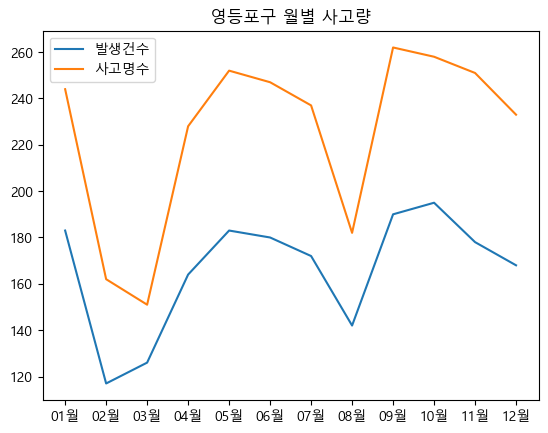

<Figure size 1400x800 with 0 Axes>

In [5]:
place = input("자치구를 입력하세요 : ")

mon_gangnam = mon.query('`자치구별(2)`== @place')
columns_to_drop = mon_gangnam.columns[3::3]
mon_gangnam.drop(columns=columns_to_drop, inplace=True)
mon_gangnam = mon_gangnam.transpose()\
            .iloc[2:-2]
gangnam_bal = mon_gangnam.iloc[::2].reset_index(drop=True)
gangnam_bal.index = [f"{str(i).zfill(2)}월" for i in range(1, 13)]
gangnam_bal.columns = ['발생건수']


gangnam_sa = mon_gangnam.iloc[1::2].reset_index(drop=True).astype(int)
gangnam_sa.index = [f"{str(i).zfill(2)}월" for i in range(1, 13)]
gangnam_sa.columns = ['부상자수']

bal =gangnam_bal['발생건수'].astype(int)
sa = gangnam_sa['부상자수'].astype(int)

sns.lineplot(data = [bal,sa], dashes = False, linestyle = '-')
plt.title(f'{place} 월별 사고량')
plt.figure(figsize=(14, 8))